In [65]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

Find the counties that have released the highest proportion of their population

In [66]:
jr = pd.read_csv('covid_jail_releases.csv')
jr = jr.iloc[1:,:7] # jail releases

# rename columns for ease of use
jr.rename(columns={'Overall Pop. Reduction / \nTotal Number of Releases':'releases',
                  'Population Prior to Releases':'prior_pop'},
          inplace=True)

# some rows have weird entries (range of values, circa values), remove
jr = jr[jr['releases'].astype(str).apply(lambda x: x.isnumeric())]
jr = jr[jr['prior_pop'].astype(str).apply(lambda x: x.isnumeric())]

# make columns numeric
jr['releases'] = pd.to_numeric(jr['releases'])
jr['prior_pop'] = pd.to_numeric(jr['prior_pop'])

# what fraction of the prior population has been released
jr['frac_reduction'] = jr['releases']/jr['prior_pop']

In [67]:
jr['County'] = jr['County'].replace('DC jail','District of Columbia')
jr['County'] = jr['County'].replace('Prince George\'s','Prince George')
jr = jr[jr['Facility']!='State-wide']

In [68]:
jr.sort_values('frac_reduction',ascending = False)

,State,County,Facility,Authorizing Agent,Known Capacity (if available),prior_pop,releases,frac_reduction
28,District of Col,District of Columbia,DC jail,NaN,NaN,1850,1442,0.779459
76,Oregon,Marion,County-wide,NaN,NaN,415,300,0.722892
41,Iowa,Polk,County-wide,NaN,NaN,1000,700,0.700000
77,Oregon,Multnomah,County-wide,"Sheriff, courts",1192.0,1097,739,0.673655
73,Oregon,Douglas,County-wide,NaN,NaN,194,128,0.659794
19,California,San Diego,Ocean View,NaN,NaN,55,34,0.618182
70,Oregon,Washington,County-wide,NaN,NaN,573,300,0.523560
72,Oregon,Deschutes,County-wide,NaN,NaN,289,148,0.512111
99,Wisconsin,Eau Claire,County-wide,Sheriff,NaN,281,143,0.508897
97,Wisconsin,Chippewa,County-wide,Sheriff,NaN,100,50,0.500000


Consider NYT county-level data, look at Marion county

In [69]:
nyt_data = pd.read_csv('NYT_data/us-counties.csv')
nyt_data = nyt_data[nyt_data['county'].isin(list(jr['County'].unique()))]

In [70]:
Marion = nyt_data[(nyt_data['county']=='Marion')&
                  (nyt_data['state']=='Oregon')]
Marion['date'] = pd.to_datetime(Marion['date'])

<function matplotlib.pyplot.plot(*args, **kwargs)>

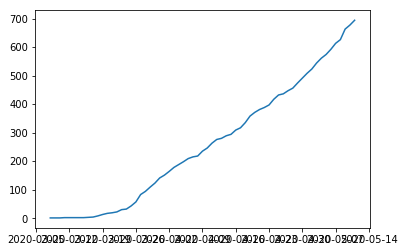

In [62]:
plt.plot(Marion['date'],Marion['cases'])